In [1]:
#import some necessary libraries導入一些必要的庫
import numpy as np # linear algebra線性代數
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)數據處理，CSV文件I / O（例如pd.read_csv）
import matplotlib.pyplot as plt  # Matlab-style plotting Matlab風格的繪圖
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn) ignore惱人的警告（來自sklearn和seaborn）


from scipy import stats
from scipy.stats import norm, skew #for some statistics一些統計數據


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points將浮點數限制為3個小數點




In [3]:
dA = pd.read_csv('C:/Users/cchcc/Downloads/HY_3B4T/2B3T/2B3T Online Data.csv',encoding='big5',header=0)

In [4]:
dA.head(5)

,Time,CIA-2000A,FIQ-A2001-CMH,A-2B3T-A_service,A-2B3T-B_service,A-2B3T-C_service,A-2B3T-D_service,A-2B3T-HCL-SP01,A-2B3T-HCL-SP03,A-2B3T-NAOH-SP00,...,C-2B3T-NAOH-SP00,C-2B3T-A,C-2B3T-B,C-2B3T-C,C-2B3T-D,C-A Pred_ServiceTime,C-B Pred_ServiceTime,C-C Pred_ServiceTime,C-D Pred_ServiceTime,prediction cycle time
0,2018/10/1 15:00,42.320,479.320,1,1,1,0.560,1600,800,1200,...,1000,24,73,106,84,350,350,350,350,1
1,2018/10/1 16:00,42.320,479.320,1,1,1,0.560,1600,800,1200,...,1000,25,74,107,85,350,350,350,350,1
2,2018/10/1 17:00,42.320,479.320,1,1,1,0.560,1600,800,1200,...,1000,26,75,108,86,350,350,350,350,1
3,2018/10/1 18:00,42.320,479.320,1,1,1,0.560,1600,800,1200,...,1000,27,76,109,87,350,350,350,350,1
4,2018/10/1 19:00,42.320,479.320,1,1,1,0.560,1600,800,1200,...,1000,28,77,110,88,350,350,350,350,1


In [5]:
b = pd.read_csv('C:/Users/cchcc/Downloads/HY_3B4T/2B3T/2B3T Condition setting.csv',encoding='big5',header=0)
W1= b['Predicted accumulation time'][0]

dA['CIA-2000A'] =dA['CIA-2000A'].rolling(window=W1, center=False).mean()
dA['FIQ-A2001-CMH'] =  dA['FIQ-A2001-CMH'].rolling(window=W1, center=False).mean()
dA['A-2B3T-A_service'] = dA['A-2B3T-A_service'].rolling(window=W1, center=False).mean()
dA['A-2B3T-B_service'] = dA['A-2B3T-B_service'].rolling(window=W1, center=False).mean()
dA['A-2B3T-C_service'] = dA['A-2B3T-C_service'].rolling(window=W1, center=False).mean()
dA['A-2B3T-D_service'] = dA['A-2B3T-D_service'].rolling(window=W1, center=False).mean()
dA['A-2B3T-HCL-SP01'] = dA['A-2B3T-HCL-SP01'].rolling(window=W1, center=False).mean()
dA['A-2B3T-HCL-SP03'] = dA['A-2B3T-HCL-SP03'].rolling(window=W1, center=False).mean()
dA['A-2B3T-NAOH-SP00'] = dA['A-2B3T-NAOH-SP00'].rolling(window=W1, center=False).mean()

dA['CIA-2000B'] = dA['CIA-2000B'].rolling(window=W1, center=False).mean()
dA['FIQ-B2001-CMH'] = dA['FIQ-B2001-CMH'].rolling(window=W1, center=False).mean()
dA['B-2B3T-A_service'] = dA['B-2B3T-A_service'].rolling(window=W1, center=False).mean()
dA['B-2B3T-B_service'] = dA['B-2B3T-B_service'].rolling(window=W1, center=False).mean()
dA['B-2B3T-C_service'] = dA['B-2B3T-C_service'].rolling(window=W1, center=False).mean()
dA['B-2B3T-D_service'] = dA['B-2B3T-D_service'].rolling(window=W1, center=False).mean()
dA['B-2B3T-E_service'] = dA['B-2B3T-E_service'].rolling(window=W1, center=False).mean()
dA['B-2B3T-F_service'] = dA['B-2B3T-F_service'].rolling(window=W1, center=False).mean()
dA['B-2B3T-HCL-SP01'] = dA['B-2B3T-HCL-SP01'].rolling(window=W1, center=False).mean()
dA['B-2B3T-HCL-SP03'] = dA['B-2B3T-HCL-SP03'].rolling(window=W1, center=False).mean()
dA['B-2B3T-NAOH-SP00'] = dA['B-2B3T-NAOH-SP00'].rolling(window=W1, center=False).mean()

dA['CIA-2000C'] = dA['CIA-2000C'].rolling(window=W1, center=False).mean()
dA['FIQ-C2001-CMH'] = dA['FIQ-C2001-CMH'].rolling(window=W1, center=False).mean()
dA['C-2B3T-A_service'] = dA['C-2B3T-A_service'].rolling(window=W1, center=False).mean()
dA['C-2B3T-B_service'] = dA['C-2B3T-B_service'].rolling(window=W1, center=False).mean()
dA['C-2B3T-C_service'] = dA['C-2B3T-C_service'].rolling(window=W1, center=False).mean()
dA['C-2B3T-D_service'] = dA['C-2B3T-D_service'].rolling(window=W1, center=False).mean()
dA['C-2B3T-HCL-SP01'] = dA['C-2B3T-HCL-SP01'].rolling(window=W1, center=False).mean()
dA['C-2B3T-HCL-SP03'] = dA['C-2B3T-HCL-SP03'].rolling(window=W1, center=False).mean()
dA['C-2B3T-NAOH-SP00'] = dA['C-2B3T-NAOH-SP00'].rolling(window=W1, center=False).mean()

In [6]:
dA.head(8)

,Time,CIA-2000A,FIQ-A2001-CMH,A-2B3T-A_service,A-2B3T-B_service,A-2B3T-C_service,A-2B3T-D_service,A-2B3T-HCL-SP01,A-2B3T-HCL-SP03,A-2B3T-NAOH-SP00,...,C-2B3T-NAOH-SP00,C-2B3T-A,C-2B3T-B,C-2B3T-C,C-2B3T-D,C-A Pred_ServiceTime,C-B Pred_ServiceTime,C-C Pred_ServiceTime,C-D Pred_ServiceTime,prediction cycle time
0,2018/10/1 15:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,24,73,106,84,350,350,350,350,1
1,2018/10/1 16:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,25,74,107,85,350,350,350,350,1
2,2018/10/1 17:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,26,75,108,86,350,350,350,350,1
3,2018/10/1 18:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,27,76,109,87,350,350,350,350,1
4,2018/10/1 19:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,28,77,110,88,350,350,350,350,1
5,2018/10/1 20:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,29,78,111,89,350,350,350,350,1
6,2018/10/1 21:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,30,79,112,90,350,350,350,350,1
7,2018/10/1 22:00,42.320,479.320,1.000,1.000,1.000,0.560,1600.000,800.000,1200.000,...,1000.000,31,80,113,91,350,350,350,350,1


In [7]:
dA.dropna(axis=0, how='any', inplace=True)

In [8]:
dA.head(10)

,Time,CIA-2000A,FIQ-A2001-CMH,A-2B3T-A_service,A-2B3T-B_service,A-2B3T-C_service,A-2B3T-D_service,A-2B3T-HCL-SP01,A-2B3T-HCL-SP03,A-2B3T-NAOH-SP00,...,C-2B3T-NAOH-SP00,C-2B3T-A,C-2B3T-B,C-2B3T-C,C-2B3T-D,C-A Pred_ServiceTime,C-B Pred_ServiceTime,C-C Pred_ServiceTime,C-D Pred_ServiceTime,prediction cycle time
7,2018/10/1 22:00,42.320,479.320,1.000,1.000,1.000,0.560,1600.000,800.000,1200.000,...,1000.000,31,80,113,91,350,350,350,350,1


In [9]:
dA['A-Run-Units'] = dA['A-2B3T-A_service'] + dA['A-2B3T-B_service'] + dA['A-2B3T-C_service']+ dA['A-2B3T-D_service']
dA['B-Run-Units'] = dA['B-2B3T-A_service'] + dA['B-2B3T-B_service'] + dA['B-2B3T-C_service']+ dA['B-2B3T-D_service']+ dA['B-2B3T-E_service']+ dA['B-2B3T-F_service']
dA['C-Run-Units'] = dA['C-2B3T-A_service'] + dA['C-2B3T-B_service'] + dA['C-2B3T-C_service']+ dA['C-2B3T-D_service']
dA['A-FIQ/Unit'] = dA['FIQ-A2001-CMH'] / dA['A-Run-Units']
dA['B-FIQ/Unit'] = dA['FIQ-B2001-CMH'] / dA['B-Run-Units']
dA['C-FIQ/Unit'] = dA['FIQ-C2001-CMH'] / dA['C-Run-Units']
dA['A-HCL-total-Inj'] = dA['A-2B3T-HCL-SP01'] + dA['A-2B3T-HCL-SP03']
dA['B-HCL-total-Inj'] = dA['B-2B3T-HCL-SP01'] + dA['B-2B3T-HCL-SP03'] 
dA['C-HCL-total-Inj'] = dA['C-2B3T-HCL-SP01'] + dA['C-2B3T-HCL-SP03']

In [10]:
dA.head(10)

,Time,CIA-2000A,FIQ-A2001-CMH,A-2B3T-A_service,A-2B3T-B_service,A-2B3T-C_service,A-2B3T-D_service,A-2B3T-HCL-SP01,A-2B3T-HCL-SP03,A-2B3T-NAOH-SP00,...,prediction cycle time,A-Run-Units,B-Run-Units,C-Run-Units,A-FIQ/Unit,B-FIQ/Unit,C-FIQ/Unit,A-HCL-total-Inj,B-HCL-total-Inj,C-HCL-total-Inj
7,2018/10/1 22:00,42.320,479.320,1.000,1.000,1.000,0.560,1600.000,800.000,1200.000,...,1,3.560,5.030,3.450,134.640,170.074,168.304,2400.000,3200.000,2700.000


In [11]:
dBA = pd.DataFrame(dA, columns=['Time','CIA-2000A', 'FIQ-A2001-CMH', 'A-Run-Units', 'A-FIQ/Unit',
                               'A-2B3T-HCL-SP01', 'A-2B3T-HCL-SP03', 'A-2B3T-NAOH-SP00', 'A-HCL-total-Inj'])

In [12]:
dBA.head(10)

,Time,CIA-2000A,FIQ-A2001-CMH,A-Run-Units,A-FIQ/Unit,A-2B3T-HCL-SP01,A-2B3T-HCL-SP03,A-2B3T-NAOH-SP00,A-HCL-total-Inj
7,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000


In [13]:
dBA.loc[W1,:]=dBA.loc[W1-1,:]
dBA.loc[W1+1,:]=dBA.loc[W1-1,:]
dBA.loc[W1+2,:]=dBA.loc[W1-1,:]
dBA.loc[W1-1,"2B3T unit-name"]='A-A'
dBA.loc[W1,"2B3T unit-name"]='A-B'
dBA.loc[W1+1,"2B3T unit-name"]='A-C'
dBA.loc[W1+2,"2B3T unit-name"]='A-D'

In [14]:
dBA.head(10)

,Time,CIA-2000A,FIQ-A2001-CMH,A-Run-Units,A-FIQ/Unit,A-2B3T-HCL-SP01,A-2B3T-HCL-SP03,A-2B3T-NAOH-SP00,A-HCL-total-Inj,2B3T unit-name
7,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-A
8,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-B
9,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-C
10,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-D


In [15]:
dBA1 = dBA
dBA1 = dBA1.rename( columns = {'CIA-2000A':'CIA-inlet',   #欄位重新命名
                    'FIQ-A2001-CMH':'FIQ/Line',
                    'A-Run-Units': 'Run-Units',
                    'A-FIQ/Unit':'FIQ/Unit' ,
                    'A-2B3T-HCL-SP01':'HCL-SP01- Inj.',
                    'A-2B3T-HCL-SP03':'HCL-SP03- Inj.',
                    'A-2B3T-NAOH-SP00':'NAOH-SP00-Inj.',
                    'A-HCL-total-Inj':'HCL-total-Inj'})

In [16]:
dBA1.head(10)

,Time,CIA-inlet,FIQ/Line,Run-Units,FIQ/Unit,HCL-SP01- Inj.,HCL-SP03- Inj.,NAOH-SP00-Inj.,HCL-total-Inj,2B3T unit-name
7,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-A
8,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-B
9,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-C
10,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-D


In [17]:
dBB = pd.DataFrame(dA, columns=['Time','CIA-2000B', 'FIQ-B2001-CMH', 'B-Run-Units', 'B-FIQ/Unit',
                               'B-2B3T-HCL-SP01', 'B-2B3T-HCL-SP03', 'B-2B3T-NAOH-SP00', 'B-HCL-total-Inj'])

In [18]:
dBB.head(10)

,Time,CIA-2000B,FIQ-B2001-CMH,B-Run-Units,B-FIQ/Unit,B-2B3T-HCL-SP01,B-2B3T-HCL-SP03,B-2B3T-NAOH-SP00,B-HCL-total-Inj
7,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000


In [19]:
dBB.loc[W1,:]=dBB.loc[W1-1,:]
dBB.loc[W1+1,:]=dBB.loc[W1-1,:]
dBB.loc[W1+2,:]=dBB.loc[W1-1,:]
dBB.loc[W1+3,:]=dBB.loc[W1-1,:]
dBB.loc[W1+4,:]=dBB.loc[W1-1,:]
dBB.loc[W1-1,"2B3T unit-name"]='B-A'
dBB.loc[W1,"2B3T unit-name"]='B-B'
dBB.loc[W1+1,"2B3T unit-name"]='B-C'
dBB.loc[W1+2,"2B3T unit-name"]='B-D'
dBB.loc[W1+3,"2B3T unit-name"]='B-E'
dBB.loc[W1+4,"2B3T unit-name"]='B-F'

In [20]:
dBB.head(10)

,Time,CIA-2000B,FIQ-B2001-CMH,B-Run-Units,B-FIQ/Unit,B-2B3T-HCL-SP01,B-2B3T-HCL-SP03,B-2B3T-NAOH-SP00,B-HCL-total-Inj,2B3T unit-name
7,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-A
8,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-B
9,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-C
10,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-D
11,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-E
12,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-F


In [21]:
dBB1 = dBB
dBB1 = dBB1.rename( columns = {'CIA-2000B':'CIA-inlet',   #欄位重新命名
                    'FIQ-B2001-CMH':'FIQ/Line',
                    'B-Run-Units': 'Run-Units',
                    'B-FIQ/Unit':'FIQ/Unit' ,
                    'B-2B3T-HCL-SP01':'HCL-SP01- Inj.',
                    'B-2B3T-HCL-SP03':'HCL-SP03- Inj.',
                    'B-2B3T-NAOH-SP00':'NAOH-SP00-Inj.',
                    'B-HCL-total-Inj':'HCL-total-Inj'})

In [22]:
dBB1.head(10)

,Time,CIA-inlet,FIQ/Line,Run-Units,FIQ/Unit,HCL-SP01- Inj.,HCL-SP03- Inj.,NAOH-SP00-Inj.,HCL-total-Inj,2B3T unit-name
7,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-A
8,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-B
9,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-C
10,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-D
11,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-E
12,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-F


In [23]:
dBC = pd.DataFrame(dA, columns=['Time','CIA-2000C', 'FIQ-C2001-CMH', 'C-Run-Units', 'C-FIQ/Unit',
                               'C-2B3T-HCL-SP01', 'C-2B3T-HCL-SP03', 'C-2B3T-NAOH-SP00', 'C-HCL-total-Inj'])

In [24]:
dBC.head(10)

,Time,CIA-2000C,FIQ-C2001-CMH,C-Run-Units,C-FIQ/Unit,C-2B3T-HCL-SP01,C-2B3T-HCL-SP03,C-2B3T-NAOH-SP00,C-HCL-total-Inj
7,2018/10/1 22:00,56.972,580.648,3.450,168.304,1600.000,1100.000,1000.000,2700.000


In [25]:
dBC.loc[W1,:]=dBC.loc[W1-1,:]
dBC.loc[W1+1,:]=dBC.loc[W1-1,:]
dBC.loc[W1+2,:]=dBC.loc[W1-1,:]
dBC.loc[W1-1,"2B3T unit-name"]='C-A'
dBC.loc[W1,"2B3T unit-name"]='C-B'
dBC.loc[W1+1,"2B3T unit-name"]='C-C'
dBC.loc[W1+2,"2B3T unit-name"]='C-D'

In [26]:
dBC.head(10)

,Time,CIA-2000C,FIQ-C2001-CMH,C-Run-Units,C-FIQ/Unit,C-2B3T-HCL-SP01,C-2B3T-HCL-SP03,C-2B3T-NAOH-SP00,C-HCL-total-Inj,2B3T unit-name
7,2018/10/1 22:00,56.972,580.648,3.450,168.304,1600.000,1100.000,1000.000,2700.000,C-A
8,2018/10/1 22:00,56.972,580.648,3.450,168.304,1600.000,1100.000,1000.000,2700.000,C-B
9,2018/10/1 22:00,56.972,580.648,3.450,168.304,1600.000,1100.000,1000.000,2700.000,C-C
10,2018/10/1 22:00,56.972,580.648,3.450,168.304,1600.000,1100.000,1000.000,2700.000,C-D


In [27]:
dBC1 = dBC
dBC1 = dBC1.rename( columns = {'CIA-2000C':'CIA-inlet',   #欄位重新命名
                    'FIQ-C2001-CMH':'FIQ/Line',
                    'C-Run-Units': 'Run-Units',
                    'C-FIQ/Unit':'FIQ/Unit' ,
                    'C-2B3T-HCL-SP01':'HCL-SP01- Inj.',
                    'C-2B3T-HCL-SP03':'HCL-SP03- Inj.',
                    'C-2B3T-NAOH-SP00':'NAOH-SP00-Inj.',
                    'C-HCL-total-Inj':'HCL-total-Inj'})

In [28]:
dBC1.head(10)

,Time,CIA-inlet,FIQ/Line,Run-Units,FIQ/Unit,HCL-SP01- Inj.,HCL-SP03- Inj.,NAOH-SP00-Inj.,HCL-total-Inj,2B3T unit-name
7,2018/10/1 22:00,56.972,580.648,3.450,168.304,1600.000,1100.000,1000.000,2700.000,C-A
8,2018/10/1 22:00,56.972,580.648,3.450,168.304,1600.000,1100.000,1000.000,2700.000,C-B
9,2018/10/1 22:00,56.972,580.648,3.450,168.304,1600.000,1100.000,1000.000,2700.000,C-C
10,2018/10/1 22:00,56.972,580.648,3.450,168.304,1600.000,1100.000,1000.000,2700.000,C-D


In [29]:
test = pd.concat([dBA1, dBB1, dBC1], axis=0) 

In [30]:
test.head(30)

,Time,CIA-inlet,FIQ/Line,Run-Units,FIQ/Unit,HCL-SP01- Inj.,HCL-SP03- Inj.,NAOH-SP00-Inj.,HCL-total-Inj,2B3T unit-name
7,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-A
8,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-B
9,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-C
10,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-D
7,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-A
8,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-B
9,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-C
10,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-D
11,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-E
12,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-F


In [31]:
test = test.reset_index(drop=True) 

In [32]:
test.head(30)

,Time,CIA-inlet,FIQ/Line,Run-Units,FIQ/Unit,HCL-SP01- Inj.,HCL-SP03- Inj.,NAOH-SP00-Inj.,HCL-total-Inj,2B3T unit-name
0,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-A
1,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-B
2,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-C
3,2018/10/1 22:00,42.320,479.320,3.560,134.640,1600.000,800.000,1200.000,2400.000,A-D
4,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-A
5,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-B
6,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-C
7,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-D
8,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-E
9,2018/10/1 22:00,56.470,855.470,5.030,170.074,1600.000,1600.000,1080.000,3200.000,B-F


In [33]:
train = pd.read_csv('C:/Users/cchcc/Downloads/HY_3B4T/2B3T/train.csv',encoding='big5',header=0)

In [34]:
#check the numbers of samples and features＃檢查樣本和功能的數量
print("The train data size is : {} ".format(train.shape))
print("The test data size is : {} ".format(test.shape))
#Save the 'Id' column＃保存'Id'列
train_Time = train['Time']
test_Time = test['Time']
test_2B3T = test['2B3T unit-name']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.＃現在刪除'Id'列，因為它不需要預測過程。
train.drop("Time", axis = 1, inplace = True)
test.drop("Time", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable刪除'Id'變量後，再次檢查數據大小
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size is : (189, 11) 
The test data size is : (14, 10) 

The train data size after dropping Id feature is : (189, 10) 
The test data size after dropping Id feature is : (14, 9) 


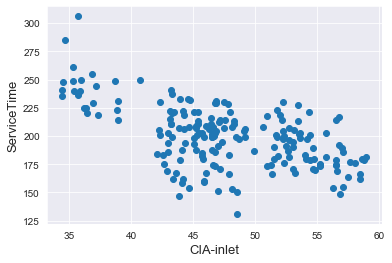

In [35]:
fig, ax = plt.subplots()
ax.scatter(x = train['CIA-inlet'], y = train['ServiceTime'])
plt.ylabel('ServiceTime', fontsize=13)
plt.xlabel('CIA-inlet', fontsize=13)
plt.show()

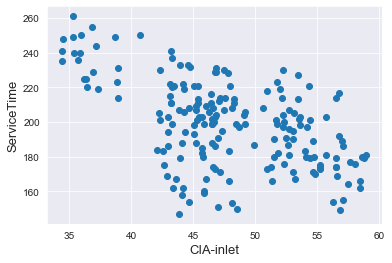

In [36]:
#Deleting outliers刪除異常值
train = train.drop(train[(train['ServiceTime']>275)] .index)
train = train.drop(train[(train['ServiceTime']<140)] .index)
fig, ax = plt.subplots()
ax.scatter(x = train['CIA-inlet'], y = train['ServiceTime'])
plt.ylabel('ServiceTime', fontsize=13)
plt.xlabel('CIA-inlet', fontsize=13)
plt.show()


 mu = 199.14 and sigma = 24.72



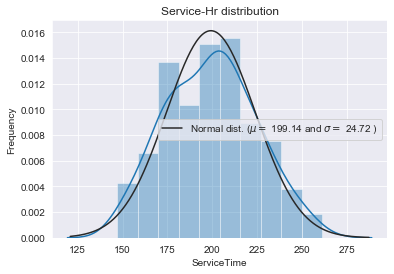

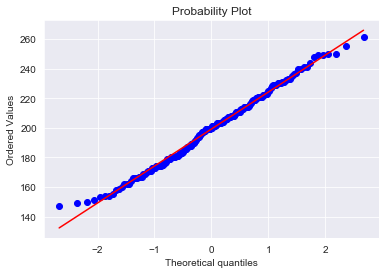

In [37]:
sns.distplot(train['ServiceTime'] , fit=norm);

# Get the fitted parameters used by the function獲取函數使用的擬合參數
(mu, sigma) = norm.fit(train['ServiceTime'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution現在繪製分佈圖
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Service-Hr distribution')

#Get also the QQ-plot獲取QQ-圖
fig = plt.figure()
res = stats.probplot(train['ServiceTime'], plot=plt)
plt.show()

In [38]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.ServiceTime.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['ServiceTime'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (200, 9)


In [39]:
all_data['2B3T unit-name'] = all_data['2B3T unit-name'].astype(str)

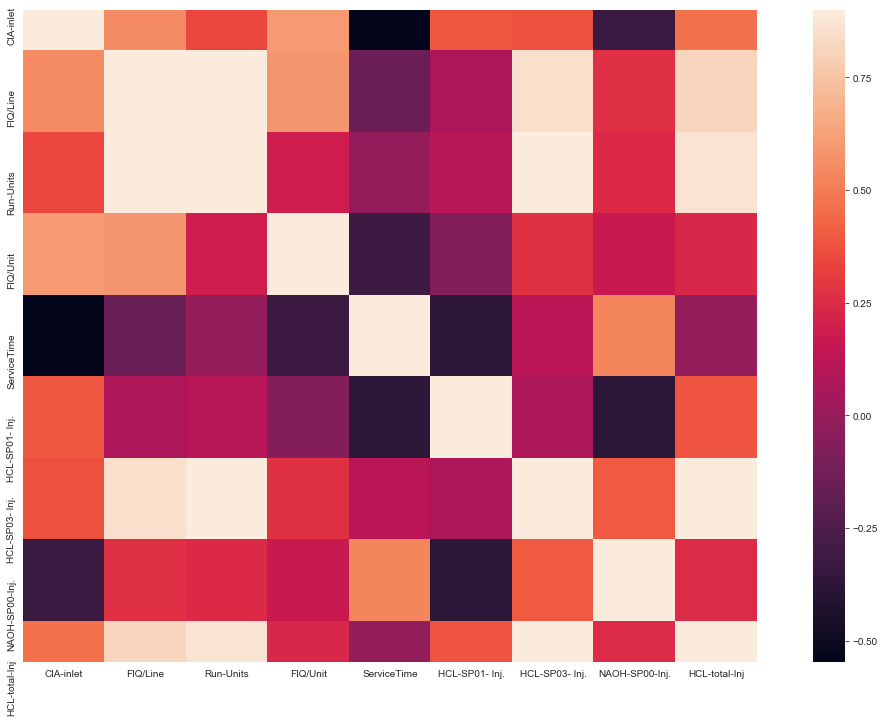

In [40]:
#Correlation map to see how features are correlated with SalePrice關聯映射，了解功能如何與SalePrice相關聯
corrmat = train.corr()
plt.subplots(figsize=(20,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


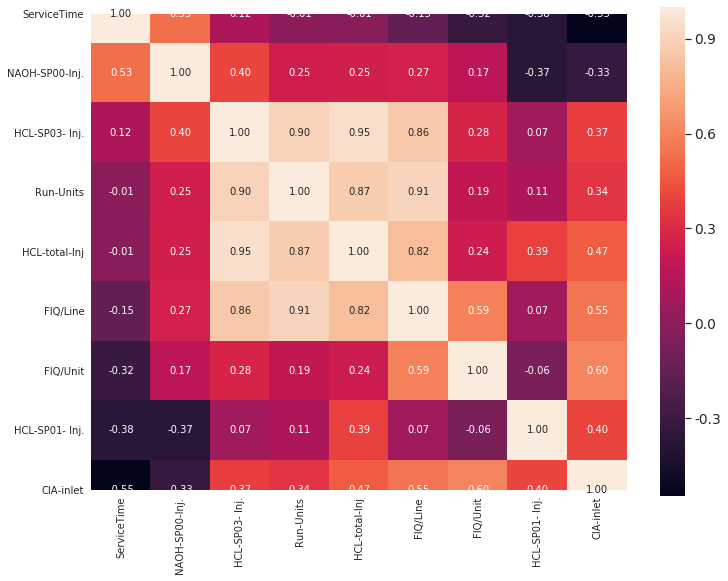

In [41]:
k = 30 #number ofvariables for heatmap
cols = corrmat.nlargest(k, 'ServiceTime')['ServiceTime'].index
cm = np.corrcoef(train[cols].values.T)
plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.show()

In [42]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features檢查所有數字特徵的偏斜
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
HCL-SP01- Inj.,2.674
Run-Units,0.249
HCL-total-Inj,0.203
HCL-SP03- Inj.,0.045
FIQ/Line,-0.050
CIA-inlet,-0.184
FIQ/Unit,-0.701
NAOH-SP00-Inj.,-0.843


In [43]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    #all_data[skewed_features] = np.log1p(all_data[skewed_features])
    

There are 8 skewed numerical features to Box Cox transform


In [44]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(200, 22)


In [45]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [46]:
train.head(5)

,CIA-inlet,FIQ/Line,FIQ/Unit,HCL-SP01- Inj.,HCL-SP03- Inj.,HCL-total-Inj,NAOH-SP00-Inj.,Run-Units,2B3T unit-name_A-A,2B3T unit-name_A-B,...,2B3T unit-name_B-A,2B3T unit-name_B-B,2B3T unit-name_B-C,2B3T unit-name_B-D,2B3T unit-name_B-E,2B3T unit-name_B-F,2B3T unit-name_C-A,2B3T unit-name_C-B,2B3T unit-name_C-C,2B3T unit-name_C-D
0,5.199,10.255,7.465,13.497,11.507,14.761,11.831,1.642,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.235,10.415,7.457,13.497,11.507,14.761,11.831,1.707,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.234,10.418,7.439,13.497,11.507,14.761,11.831,1.715,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5.239,10.389,7.409,13.497,11.507,14.761,11.831,1.720,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.202,10.498,7.416,13.497,11.507,14.761,11.831,1.758,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [48]:
#Validation function驗證功能
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [49]:
model_LinearRegression = LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=None)

In [50]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [51]:
score = rmse_cv(model_LinearRegression)
print("LinearRegression score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LinearRegression score: 11.7412 (2.2550)



In [52]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 12.0997 (2.5330)



In [53]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [54]:
model_LinearRegression.fit(train, y_train)
LinearRegression_train_pred = model_LinearRegression.predict(train)
LinearRegression_pred = np.array(model_LinearRegression.predict(test))
print(rmse(y_train, LinearRegression_train_pred))

9.297763840065493


In [55]:
lasso.fit(train, y_train)
lasso_train_pred = lasso .predict(train)
lasso_pred=np.array(lasso.predict(test.values))
print(rmse(y_train, lasso_train_pred))

9.386629418209296


In [56]:
ensemble_1 = LinearRegression_pred*1.0 

In [57]:
print(model_LinearRegression.coef_)

[ -87.77701492 -364.47348572  353.62811469  133.37486698   89.11562413
 -194.16726303    2.86563057  904.6089153   -57.81027965  -60.17614791
  -45.79914322  -58.51049697   11.92126672   31.4366523    17.07863586
   23.35383884   35.03564484   38.1656562    24.34900467    7.32579622
   25.68931347    7.94025865]


In [58]:
print(model_LinearRegression.intercept_ )

304.219088942191


ensemble_1 =lasso_pred*1.0 

In [59]:
a1 = pd.DataFrame()
a1['Time'] = test_Time
a1['2B3T unit-name']=test_2B3T
a1['LinearRegression_pred'] = ensemble_1

#sub.to_csv('SP01.csv',index=False)

In [60]:
a1["ServiceTime1"] = round(a1['LinearRegression_pred'])

W2 = b['A-A Line time UL'][0]
W3 = b['A-A Line time LL'][0]
W4 = b['A-B Line time UL'][0]
W5 = b['A-B Line time LL'][0]
W6 = b['A-C Line time UL'][0]
W7 = b['A-C Line time LL'][0]
W8 = b['A-D Line time UL'][0]
W9 = b['A-D Line time LL'][0]
W10 = b['B-A Line time UL'][0]
W11 = b['B-A Line time LL'][0]
W12 = b['B-B Line time UL'][0]
W13 = b['B-B Line time LL'][0]
W14 = b['B-C Line time UL'][0]
W15 = b['B-C Line time LL'][0]
W16 = b['B-D Line time UL'][0]
W17 = b['B-D Line time LL'][0]
W18 = b['B-E Line time UL'][0]
W19 = b['B-E Line time LL'][0]
W20 = b['B-F Line time UL'][0]
W21 = b['B-F Line time LL'][0]
W22 = b['C-A Line time UL'][0]
W23 = b['C-A Line time LL'][0]
W24 = b['C-B Line time UL'][0]
W25 = b['C-B Line time LL'][0]
W26 = b['C-C Line time UL'][0]
W27 = b['C-C Line time LL'][0]
W28 = b['C-D Line time UL'][0]
W29 = b['C-D Line time LL'][0]


if  a1['LinearRegression_pred'][0] > W2:
     a1['ServiceTime1'][0] = W2 
elif a1['LinearRegression_pred'][0] < W3:   
     a1['ServiceTime1'][0] = W3

if  a1['LinearRegression_pred'][1] > W4:
     a1['ServiceTime1'][1] = W4 
elif a1['LinearRegression_pred'][1] < W5:   
     a1['ServiceTime1'][1] = W5
        
if  a1['LinearRegression_pred'][2] > W6:
     a1['ServiceTime1'][2] = W6 
elif a1['LinearRegression_pred'][2] < W7:   
     a1['ServiceTime1'][2] = W7 
        
if  a1['LinearRegression_pred'][3] > W8:
     a1['ServiceTime1'][3] = W8 
elif a1['LinearRegression_pred'][3] < W9:   
     a1['ServiceTime1'][3] = W9 
        
if  a1['LinearRegression_pred'][4] > W10:
     a1['ServiceTime1'][4] = W10 
elif a1['LinearRegression_pred'][4] < W11:   
     a1['ServiceTime1'][4] = W11         
        
if  a1['LinearRegression_pred'][5] > W12:
     a1['ServiceTime1'][5] = W12 
elif a1['LinearRegression_pred'][5] < W13:   
     a1['ServiceTime1'][5] = W13   
        
if  a1['LinearRegression_pred'][6] > W14:
     a1['ServiceTime1'][6] = W14 
elif a1['LinearRegression_pred'][6] < W15:   
     a1['ServiceTime1'][6] = W15  
        
if  a1['LinearRegression_pred'][7] > W16:
     a1['ServiceTime1'][7] = W16 
elif a1['LinearRegression_pred'][7] < W17:   
     a1['ServiceTime1'][7] = W17          
        
if  a1['LinearRegression_pred'][8] > W18:
     a1['ServiceTime1'][8] = W18 
elif a1['LinearRegression_pred'][8] < W19:   
     a1['ServiceTime1'][8] = W19 
        
if  a1['LinearRegression_pred'][9] > W20:
     a1['ServiceTime1'][9] = W20 
elif a1['LinearRegression_pred'][9] < W21:   
     a1['ServiceTime1'][9] = W21         
        
if  a1['LinearRegression_pred'][10] > W22:
     a1['ServiceTime1'][10] = W22 
elif a1['LinearRegression_pred'][10] < W23:   
     a1['ServiceTime1'][10] = W23          
        
if  a1['LinearRegression_pred'][11] > W24:
     a1['ServiceTime1'][11] = W24 
elif a1['LinearRegression_pred'][11] < W25:   
     a1['ServiceTime1'][11] = W25           

if  a1['LinearRegression_pred'][12] > W26:
     a1['ServiceTime1'][12] = W26 
elif a1['LinearRegression_pred'][12] < W27:   
     a1['ServiceTime1'][12] = W27            

if  a1['LinearRegression_pred'][13] > W28:
     a1['ServiceTime1'][13] = W28 
elif a1['LinearRegression_pred'][13] < W29:   
     a1['ServiceTime1'][13] = W29 

In [61]:
a1

,Time,2B3T unit-name,LinearRegression_pred,ServiceTime1
0,2018/10/1 22:00,A-A,200.282,200.000
1,2018/10/1 22:00,A-B,197.916,198.000
2,2018/10/1 22:00,A-C,212.293,212.000
3,2018/10/1 22:00,A-D,199.582,200.000
4,2018/10/1 22:00,B-A,160.992,161.000
5,2018/10/1 22:00,B-B,180.507,181.000
6,2018/10/1 22:00,B-C,166.149,166.000
7,2018/10/1 22:00,B-D,172.425,172.000
8,2018/10/1 22:00,B-E,184.106,184.000
9,2018/10/1 22:00,B-F,187.236,187.000


In [63]:
CAA = pd.read_csv('C:/Users/cchcc/Downloads/HY_3B4T/2B3T/2B3T Online Data.csv',encoding='big5',header=0)

In [64]:
CA = dA.reset_index(drop=True) 

In [65]:
a1["ServiceTime"] = a1['ServiceTime1']


if  a1['ServiceTime1'][0] < CA['A-2B3T-A'][0]:
     a1['ServiceTime'][0] = CAA['A-A Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1]  

if  a1['ServiceTime1'][1] < CA['A-2B3T-B'][0]:
     a1['ServiceTime'][1] = CAA['A-B Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1] 
        
if  a1['ServiceTime1'][2] < CA['A-2B3T-C'][0]:
     a1['ServiceTime'][2] = CAA['A-C Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1] 
        
if  a1['ServiceTime1'][3] < CA['A-2B3T-D'][0]:
     a1['ServiceTime'][3] = CAA['A-D Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1] 
        
if  a1['ServiceTime1'][4] < CA['B-2B3T-A'][0]:
     a1['ServiceTime'][4] = CAA['B-A Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1]  
        
if  a1['ServiceTime1'][5] < CA['B-2B3T-B'][0]:
     a1['ServiceTime'][5] = CAA['B-B Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1] 
         
if  a1['ServiceTime1'][6] < CA['B-2B3T-C'][0]:
     a1['ServiceTime'][6] = CAA['B-C Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1] 
        
if  a1['ServiceTime1'][7] < CA['B-2B3T-D'][0]:
     a1['ServiceTime'][7] = CAA['B-D Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1]  
        
if  a1['ServiceTime1'][8] < CA['B-2B3T-E'][0]:
     a1['ServiceTime'][8] = CAA['B-E Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1] 
        
if  a1['ServiceTime1'][9] < CA['B-2B3T-F'][0]:
     a1['ServiceTime'][9] = CAA['B-F Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1] 
        
if  a1['ServiceTime1'][10] < CA['C-2B3T-A'][0]:
     a1['ServiceTime'][10] = CAA['C-A Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1]   
        
if  a1['ServiceTime1'][11] < CA['C-2B3T-B'][0]:
     a1['ServiceTime'][11] = CAA['C-B Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1]   

if  a1['ServiceTime1'][12] < CA['C-2B3T-C'][0]:
     a1['ServiceTime'][12] = CAA['C-C Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1] 
        
if  a1['ServiceTime1'][13] < CA['C-2B3T-D'][0]:
     a1['ServiceTime'][13] = CAA['C-D Pred_ServiceTime'][W1-CA['prediction cycle time'][0]-1] 

In [66]:
a1

,Time,2B3T unit-name,LinearRegression_pred,ServiceTime1,ServiceTime
0,2018/10/1 22:00,A-A,200.282,200.000,200.000
1,2018/10/1 22:00,A-B,197.916,198.000,198.000
2,2018/10/1 22:00,A-C,212.293,212.000,212.000
3,2018/10/1 22:00,A-D,199.582,200.000,200.000
4,2018/10/1 22:00,B-A,160.992,161.000,161.000
5,2018/10/1 22:00,B-B,180.507,181.000,181.000
6,2018/10/1 22:00,B-C,166.149,166.000,166.000
7,2018/10/1 22:00,B-D,172.425,172.000,172.000
8,2018/10/1 22:00,B-E,184.106,184.000,184.000
9,2018/10/1 22:00,B-F,187.236,187.000,187.000


In [67]:
y = pd.DataFrame()
y['Time'] = a1['Time']
y['2B3T unit-name'] = a1['2B3T unit-name']
y['ServiceTime'] = a1['ServiceTime']

In [69]:
y.to_csv('C:/Users/cchcc/Downloads/HY_3B4T/2B3T/Out/SP.csv',index=False)

In [70]:
e = pd.read_csv('C:/Users/cchcc/Downloads/HY_3B4T/2B3T/X.csv',encoding='big5',header=0)

In [71]:
s11 = b['Abnormal number of consecutive constants'][0]-1
e['CIA_2000AdX']= abs(e['CIA-2000A'].shift()-e['CIA-2000A'])
e['CIA_2000A']= e['CIA-2000A']
e['CIA_2000AdX1'] = e['CIA_2000AdX'].rolling(s11).sum()
e['FIQ_A2001CMHdX']= abs(e['FIQ-A2001-CMH'].shift()-e['FIQ-A2001-CMH'])
e['FIQ_A2001CMH']= e['FIQ-A2001-CMH']
e['FIQ_A2001CMHdX1'] = e['FIQ_A2001CMHdX'].rolling(s11).sum()
e['CIA_2000BdX']= abs(e['CIA-2000B'].shift()-e['CIA-2000B'])
e['CIA_2000B']= e['CIA-2000B']
e['CIA_2000BdX1'] = e['CIA_2000BdX'].rolling(s11).sum()
e['FIQ_B2001CMHdX']= abs(e['FIQ-B2001-CMH'].shift()-e['FIQ-B2001-CMH'])
e['FIQ_B2001CMH']= e['FIQ-B2001-CMH']
e['FIQ_B2001CMHdX1'] = e['FIQ_B2001CMHdX'].rolling(s11).sum()
e['CIA_2000CdX']= abs(e['CIA-2000C'].shift()-e['CIA-2000C'])
e['CIA_2000C']= e['CIA-2000C']
e['CIA_2000CdX1'] = e['CIA_2000CdX'].rolling(s11).sum()
e['FIQ_C2001CMHdX']= abs(e['FIQ-C2001-CMH'].shift()-e['FIQ-C2001-CMH'])
e['FIQ_C2001CMH']= e['FIQ-C2001-CMH']
e['FIQ_C2001CMHdX1'] = e['FIQ_C2001CMHdX'].rolling(s11).sum()

e.dropna(axis=0, how='any', inplace=True)

In [72]:
e.head(10)

,Time,CIA-2000A,FIQ-A2001-CMH,CIA-2000B,FIQ-B2001-CMH,CIA-2000C,FIQ-C2001-CMH,CIA_2000AdX,CIA_2000A,CIA_2000AdX1,...,CIA_2000BdX1,FIQ_B2001CMHdX,FIQ_B2001CMH,FIQ_B2001CMHdX1,CIA_2000CdX,CIA_2000C,CIA_2000CdX1,FIQ_C2001CMHdX,FIQ_C2001CMH,FIQ_C2001CMHdX1
3,2018/10/1 18:30,50,600.000,60.000,900.000,53.000,541.000,10.000,50,40.000,...,12.470,200.000,900.000,364.530,18.000,53.000,39.972,11.000,541.000,61.648


In [73]:
s12 = b['CIA-2000A UCL'][0]
s13 = b['CIA-2000A LCL'][0]
e["CIA-2000A_variation"] =0
e.loc[(e.CIA_2000A >s13) & (e.CIA_2000A <s12) & (e.CIA_2000AdX1 !=0)  ,'CIA-2000A_variation'] = 1

In [74]:
s14 = b['CIA-2000B UCL'][0]
s15 = b['CIA-2000B LCL'][0]
e["CIA-2000B_variation"] =0
e.loc[(e.CIA_2000B >s15) & (e.CIA_2000B <s14) & (e.CIA_2000BdX1 !=0)  ,'CIA-2000B_variation'] = 1

In [75]:
s16 = b['CIA-2000C UCL'][0]
s17 = b['CIA-2000C LCL'][0]
e["CIA-2000C_variation"] =0
e.loc[(e.CIA_2000C >s17) & (e.CIA_2000C <s16) & (e.CIA_2000CdX1 !=0)  ,'CIA-2000C_variation'] = 1

In [76]:
s18 = b['FIQ-A2001-CMH UCL'][0]
s19 = b['FIQ-A2001-CMH LCL'][0]
e["FIQ_A2001CMH_variation"] =0
e.loc[(e.FIQ_A2001CMH >s19) & (e.FIQ_A2001CMH <s18) & (e.FIQ_A2001CMHdX1 !=0)  ,'FIQ_A2001CMH_variation'] = 1

In [77]:
s20 = b['FIQ-B2001-CMH UCL'][0]
s21 = b['FIQ-B2001-CMH LCL'][0]
e["FIQ_B2001CMH_variation"] =0
e.loc[(e.FIQ_B2001CMH >s21) & (e.FIQ_B2001CMH <s20) & (e.FIQ_B2001CMHdX1 !=0)  ,'FIQ_B2001CMH_variation'] = 1

In [78]:
s22 = b['FIQ-C2001-CMH UCL'][0]
s23 = b['FIQ-C2001-CMH LCL'][0]
e["FIQ_C2001CMH_variation"] =0
e.loc[(e.FIQ_C2001CMH >s23) & (e.FIQ_C2001CMH <s22) & (e.FIQ_C2001CMHdX1 !=0)  ,'FIQ_C2001CMH_variation'] = 1

In [80]:
p = pd.DataFrame()
p['Time'] = e['Time']
p['CIA-2000A_variation'] = e['CIA-2000A_variation']
p['CIA-2000B_variation'] = e['CIA-2000B_variation']
p['CIA-2000C_variation'] = e['CIA-2000C_variation']
p['FIQ_A2001CMH_variation'] = e['FIQ_A2001CMH_variation']
p['FIQ_B2001CMH_variation'] = e['FIQ_B2001CMH_variation']
p['FIQ_C2001CMH_variation'] = e['FIQ_C2001CMH_variation']

p.to_csv('C:/Users/cchcc/Downloads/HY_3B4T/2B3T/XY.csv',index=False)